## 1. Problem Background
<img src='https://www.mcrsafety.com/~/media/mcrsafety/industry/categories/automotive/automotive_herou.png?h=550&iar=0&mw=1900&w=1300&hash=D88BC48B9CAF819617593F71E0E88EE2 '/>
<Title>*What is the problem we are trying to solve?</Title>
<br>Leverage data from consumers, vehicles, factories, and beyond to maximize quality, increase customer satisfaction, and improve brand loyalty.</br>
<Title>*Who might be interested in this problem and why?</Title>
<br>-Insurance companies for example, it is important to have access to data about the vehicle, such as mileage, and driver skills, such as acceleration, cornering and braking, to determine the insurance rates.</br>
<br>-Car Companies can analyze their existing customers to identify characteristics that predict a purchase. Big data can also help car companies use insights like past vehicle purchases, online behavior, and demographics to create personalized marketing communications and share relevant content.</br>
<body><br>*Parameters/Features to monitor which might impact.</br>
<br>-Make</br>
<br>-Model</br>
<br>-Year</br>
<br>-Engine Fuel Type</br>
<br>-Engine HP</br>
<br>-Engine Cylinders</br>
<br>-Transmission Type</br>
<br>-Driven_Wheels</br>
<br>-Number of Doors</br>
<br>-Market Category</br>
<br>-Vehicle Size</br>
<br>-Vehicle Style</br>
<br>-Highway MPG</br>
<br>-City mpg</br>
<br>-Popularity</br>
<br>-MSRP</br></body>






<title>Brief outline of tasks ahead</title>
<br>1. Import Package</br>
<br>2. Connect to Data Source and Data Extraction</br>
<br>3. Data Exploration, Data Transformation</br>
<br>4. Machine Learning Model</br>
<br>5. Deployment of Model</br>


# Data Prep

- [ ] Initial Evaluation
- [ ] Initial Cleanup - dupes, missing values
- [ ] Distributions/ranges
- [ ] Outlier Detection & Treatment
- [ ] Feature Transformations
- [ ] Feature Selection
- [ ] Final Prep before ML - Train/Test Splitting

## 2. Import Package 
<br>

### Libraries<br>

>**Numpy and Pandas:**<br>
We use it to import the data files which has multi-dimensional arrays and matrices and for data manipulations  <br>

>**SKLearn:**<br>
Sklearn provides multiple machine learning and statistical models to which can best describe the pattern in the data. It also provides metrics toevaluate the performance of the model    <br>

>**Pickle:**<br>
Pickle library converts a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network. Thus making it accessible and  easier to work with in deployment

>**Matplotlib, Seaboen, Plotly and Cufflink:**<br>
These libraries are used for data visualization

In [1]:
# data manipulation libraries
import numpy as np
import pandas as pd

# machine learning model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# orchestration of python object
import pickle

# visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import cufflinks as cf

# to show graphs in the notebook
%matplotlib inline

# set theme of the graphs
sns.set_theme(style='whitegrid',palette='RdBu_r')

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
#cf.go_offline()

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format= '{:.2f}'.format# converting scientific values to normal numbers 
import numpy as np
import math

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import statsmodels.api as sm

## 3. Connect to Data Source and Data Extraction <a class="anchor" id="data-extraction"></a>
1. The below cells connects the notebook to different sources (eg. DWH, Flat files etc) and creates a source dataframe. Later, we will be using the source dataframe to analyze the data, feature selection and for running machine learning model.

2. Optimize the data extraction to reduce the extraction time and load on the data source. For example:
    2.1 Create incremental loop
    2.2 Load selected columns
    2.3 Load the data in batches

3. If there are multiple tables, concat, merge or join operation will be used in the data manipulation section to create a summarized version for Machine learning model



In [3]:
df = pd.read_csv('data.csv')## read csv file from the source location and load it into a dataframe and preview it
df.tail(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.00,8.00,MANUAL,rear wheel drive,2.00,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.00,8.00,MANUAL,rear wheel drive,2.00,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Luxury,Midsize,Sedan,26,17,61,28995


>**Observations:**<br>
>>**11915 Records**<br><br>
>>**Target:** Our target variable is 'Price'<br>
<br>Feature                  Thoughts and expectations</br>
**Make:                    Should affect price+</BR>
**Model:                   Should Affect price, better model price should be higher</BR>
**Year:                    - relation</BR>
**Engine Fuel Type:        cheaper fuel, price higher eg, diesel cars</BR>
**Engine HP:               + relation</BR>
**Engine Cylinders:         + relation</BR>
**Transmission Type:        neutral</BR>
**Driven_Wheels:        neutral</BR>
**Number of DoorR:         neutral</BR>
**Market Category:          dempgraphic</BR>
**Vehicle Size:             + relation</BR>
**Vehicle Style:            neutal</BR>
**highway MPG:              - related as higher milage the cost is low and low mileage the cost is high, high horse power engine</BR>
</BR>city mpg -                - related as higher milage the cost is low and low mileage the cost is high, high horse power engine</BR>
*Popularity:              - popular model should be cheaper</BR>



In [4]:
# check column names of the data set
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### 3.1 Rename Columns (If Required)
Rename the columns to user friendly names

eg. When we connect to SAP database, the column names are not user friendly as column names follows SAP convention. Thus change the column names, so that it is easier to interpret the columns

## 4. Data Exploration, Data Transformation <a class="anchor" id="data-transformation"></a>
Analyze the data for:
1. Check data type of each column
2. Fix the issue of Missing data
3. Outlier detection and removal
4. Create visualization to understand the relationship between target variable and input variable
5. Create calculated dimensions
6. Create numerical columns for Categorical values and feature selection


In [5]:
# 4.1 check number of rows with non null values and data type of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df[df['Market Category'].isna()]# this shows all the rows where market category has null values

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.00,4.00,MANUAL,front wheel drive,2.00,NaN,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.00,4.00,MANUAL,front wheel drive,2.00,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.00,4.00,MANUAL,front wheel drive,2.00,NaN,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.00,4.00,MANUAL,front wheel drive,2.00,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.00,4.00,MANUAL,front wheel drive,2.00,NaN,Compact,Coupe,35,25,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.00,6.00,MANUAL,all wheel drive,2.00,NaN,Compact,Coupe,23,16,640,2000
11809,Toyota,Yaris iA,2017,regular unleaded,106.00,4.00,MANUAL,front wheel drive,4.00,NaN,Compact,Sedan,39,30,2031,15950
11810,Toyota,Yaris iA,2017,regular unleaded,106.00,4.00,AUTOMATIC,front wheel drive,4.00,NaN,Compact,Sedan,40,32,2031,17050
11867,GMC,Yukon,2015,premium unleaded (recommended),420.00,8.00,AUTOMATIC,rear wheel drive,4.00,NaN,Large,4dr SUV,21,15,549,64520


In [7]:
# some of the statistical kpis for the loaded data
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.00,11845.00,11884.00,11908.00,11914.00,11914.00,11914.00,11914.00
mean,2010.38,249.39,5.63,3.44,26.64,19.73,1554.91,40594.74
std,7.58,109.19,1.78,0.88,8.86,8.99,1441.86,60109.10
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00
25%,2007.00,170.00,4.00,2.00,22.00,16.00,549.00,21000.00
50%,2015.00,227.00,6.00,4.00,26.00,18.00,1385.00,29995.00
75%,2016.00,300.00,6.00,4.00,30.00,22.00,2009.00,42231.25
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00


In [8]:
# value count of target variables
df['MSRP'].value_counts()

2000     1036
29995      19
25995      19
20995      16
27995      16
         ... 
18855       1
22575       1
20050       1
26965       1
50920       1
Name: MSRP, Length: 6049, dtype: int64

In [9]:
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping duplicates:', len(df))

Number of records: 11914
Number of records after dropping duplicates: 11914


## There are no duplicates in the record.

### 4.2 Fix the issue of Missing data
Missing values will be highlighted in yellow.

Resolve the missing values by:
1. Fill missing values with default value/average value
2. Drop column if it is not usable or if the number of missing values is very high

# The function dataframe. isnull(). sum() returns the number of missing values in the data set.

In [10]:
df.isnull().sum()


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

<AxesSubplot:>

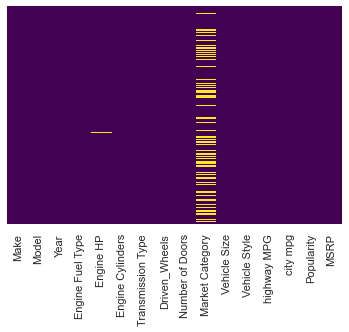

In [11]:
# check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df = df.drop('Market Category',axis=1)



### Dropped market category all together because it contains too many missing values

<AxesSubplot:>

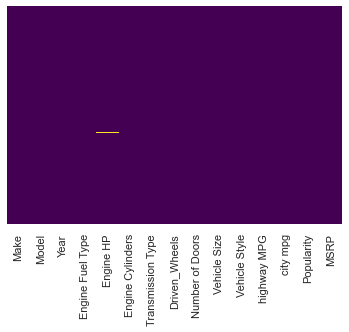

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [14]:
# Filling up the empty cells of Engine HP,Engine Fuel Type,MSRP,Engine Cylinders,Number of Doors  with 0
df.fillna({'Engine HP':0},  inplace=True)
df.fillna({'Engine Fuel Type':0},  inplace=True)
df.fillna({'MSRP':0},  inplace=True)
df.fillna({'Engine Cylinders':0},  inplace=True)
df.fillna({'Number of Doors':0},  inplace=True)

<AxesSubplot:>

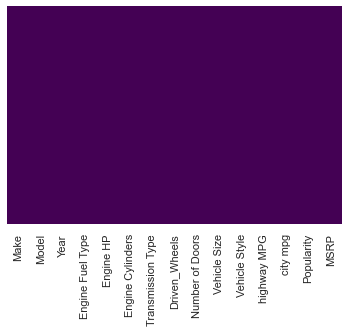

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [16]:
cat_vars = ['Make','Model','Engine Fuel Type',
            'Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style']
# Loop over categorical vars and encode each one
for var in cat_vars:
    df[var] = df[var].astype("category")

df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_', drop_first=True)

## Though I don't understand the code fully. I believe that here the categorical variables are being converted into Binary Variables. The categorical variables are converted into multiple columns. I saw in the below code that I have to use 'Vehicle Style_Wagon' instead of 'Vehicle Style'. Also  I noticed that after a categorical variable is converted into numerical values, we cannot call the original variable.

><h3>Quick look at correlations</h3>
Now that we've cleaned up our numerical variables, let's take a quick look at the correlation matrix of our numerical variables to see if we can spot the most promising feature to move forward with

## Heat Map interpretation: You can think of a heat map as a data-driven “paint by numbers” canvas overlaid on top of an image. In short, an image is divided into a grid and within each square, the heat map shows the relative intensity of values captured by your eye tracker by assigning each value a color representation.
<img src='https://i.stack.imgur.com/Lh8tv.png' />

## The correlation is directly proportional to the intensity of the colour depicting the intersection region.The section which are darker are more correlated as compared to the sections that are not. 



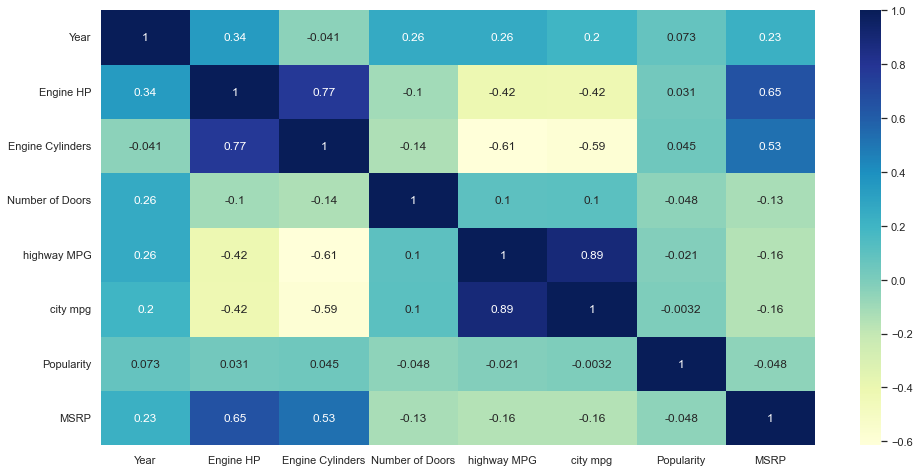

In [17]:
cars_n = df.select_dtypes(include=['float64', 'int'])
cars_n.head()
corr = cars_n.corr()
corr
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

## After looking at the heatmap the attributes which are highly positive relation to MSRP is the Engine Hp, Engine Cylinders and Year everything else should be dropped Number of Doors, highway MPG city mpg Popularity.  **

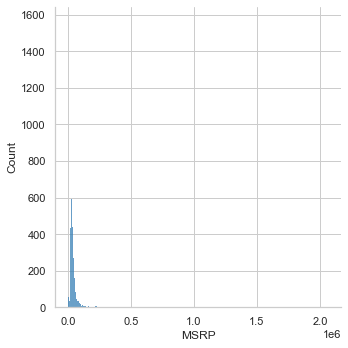

In [18]:
sns.displot(df.MSRP)

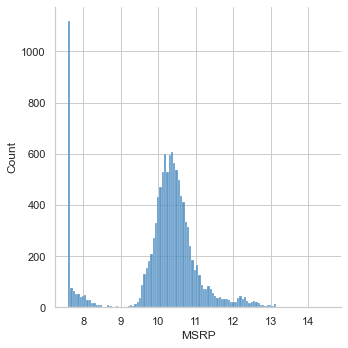

In [19]:
sns.displot(np.log1p(df.MSRP))

In [20]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

In [21]:
predictors = ['Engine HP', 'Year','Engine Cylinders','Vehicle Style_Wagon',]

target = ['MSRP']

X = df[predictors]
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

## Model 1 
Regression model with one predictors: one numeric.
>- Sticking with Engine Hp for the one numeric predictor

In [22]:
simple_var = ['Engine HP']

model = LinearRegression()
model.fit(X_train[simple_var],y_train)

# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)

                   Train             Test
R2                  0.43             0.41
Adj-R2              0.43             0.41
MAE             20598.02         20653.87
MAPE              137.40           138.50
SSE    16424388972954.05 8432152648741.41


## The MAPE for the training data comes out to be 137.40
## The MAPE for the test data is 138.5
## The delta for mape values is 138.5-137.40= 1.2. As our model performs well on train  data as well as test data,there is no evidence of overfitting.


## Model 2
Regression model with TWO predictors: one numeric,one categorical:
>- Sticking with Engine Hp for the one numeric predictor
>- For categorical variable I'll go with 'Vehicle Style_Wagon'


In [23]:
simple_var = ['Engine HP','Vehicle Style_Wagon']

model = LinearRegression()
model.fit(X_train[simple_var],y_train)

# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)

                   Train             Test
R2                  0.43             0.41
Adj-R2              0.43             0.41
MAE             20591.24         20645.89
MAPE              137.50           138.60
SSE    16422304374844.62 8430626188952.47


## Here we are Training  and testing a second regression model –this model includes ONE continuous numerical feature(Engine Horsepower) and ONE categorical variable(Vehicle Style_Wagon). Both of these features are Highly correlated with the our target MSRP are the r squared values are high.

## Model 3
Regression model with TWO predictors: one numeric,one categorical:
>- Sticking with Engine Hp,Year,Engine Cylinders for the  numeric predictor
>- For categorical variable I'll go with 'Vehicle Style_Wagon'


In [24]:
simple_var = ['Engine HP','Vehicle Style_Wagon','Year','Engine Cylinders']

model = LinearRegression()
model.fit(X_train[simple_var],y_train)

# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)

                   Train             Test
R2                  0.43             0.41
Adj-R2              0.43             0.41
MAE             20824.01         20899.18
MAPE              141.80           143.30
SSE    16342630126905.50 8415388697171.63


## The MAPE for the training data comes out to be 141.80
## The MAPE for the test data is 143.30
## The delta for mape values is 143.30-141.80= 1.5.As the Mape values are  As our model performs well on train  data as well as test data,there is no evidence of overfitting.


## Conclusion  


<br>Absolutely not satisfied with my model's performance as any MAPE value above 25% is not considered good for prediction.
The mape values in my model are coming above 100% which is horrible in terms of prediction.</br>
<br>I did not transfrom into logarithm, may be thats why the MAPE is so high.</br>

## What would you do differently if you could?
</br> I would want to do a better feature selection Feature Selection of the best subset of attributes which better explains the relationship of independent variables with target variable.</br>
</br> I Would want to do a better domain research to increase my insights</br>
<br>I would want to do a better Visualization as it helps to visualize the relationship between variables, which makes variable selection process easier.</br>


## Based on your findings – what would you want to communicate to business leadership in this industry?  
As I performmed the analysis, I understood that engine horsepower is a great predictor variable that is the MSRP varies directly in relationship to the engine Hp. I would want to communicate to business leadership that people want to buy cars which have hp in the lower segment as after a certain threshold hp of about 600 the price increases drastically. For Example some car having 550 hp will cost about 30K but a car having 650 hp engine will be around 200k. Not sure if I am totally correct.
 



## Things that I understood from this Problem set

Linear Regression:
<br>Linear regression analysis is used to predict the value of a target variable based on the value of another variable. The variable you want to predict is called the dependent variable.This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable.</br>
Overfitting:
<br> Overfitting is a modeling error in statistics that occurs when a function is too closely aligned to a limited set of data points. The thing i learnt on overfitting is that it our model performs well on training data but it does not perform well on test data.</br>
R squared:
<br> It represents the proportion of the variance for a dependent variable that's explained by an independent variable.</br>
MAPE(Mean absolute percentage error):
<br> It measures accuracy of a prediction system. It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values. 
</br>
